In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statistics import mean
import re
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
import random

In [2]:
campaign_desc_df = pd.read_csv('campaign_desc.csv')
campaign_table_df = pd.read_csv('campaign_table.csv')
causal_data_df = pd.read_csv('causal_data.csv')
coupon_redempt_df = pd.read_csv('coupon_redempt.csv')
coupon_df = pd.read_csv('coupon.csv')
hh_demographic_df = pd.read_csv('hh_demographic.csv')
product_df = pd.read_csv('product.csv')
transaction_data_df = pd.read_csv('transaction_data.csv')



In [3]:
campaign_desc_df.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [8]:
campaign_table_df.head()

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [9]:
causal_data_df.head()

,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer
0,26190,286,70,0,A
1,26190,288,70,0,A
2,26190,289,70,0,A
3,26190,292,70,0,A
4,26190,293,70,0,A


In [10]:
coupon_redempt_df.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [11]:
coupon_df.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [160]:
hh_demographic_df.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Mean_Income
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,42000
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,62000
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8,29500
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13,87000
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16,62000


In [13]:
product_df.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [65]:
transaction_data_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


## Exploratory Data Analysis

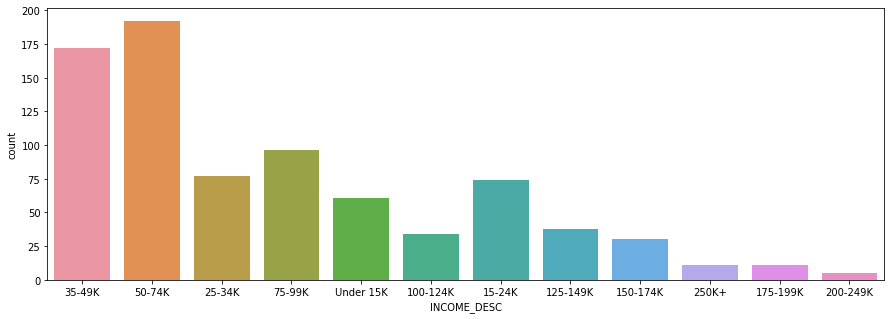

In [4]:
plt.figure(figsize=(15,5))
sns.countplot(x="INCOME_DESC",data=hh_demographic_df);

Most of the households below to 50-74K income group. Let's convert this to a mean household income.

In [3]:
#hh_demographic_df["Mean_Income"]=
def get_mean_income(row):
    string_list=re.split("-",row)
    if 'Under' in string_list[0] or '+' in string_list[0]:
        if 'Under' in string_list[0]:
            low=0
        else:
            low=250000
    else:
        low=int(string_list[0])*1000
        
    if 'Under' in string_list[0] or '+' in string_list[0]:
        if 'Under' in string_list[0]:
            high=15000
        else:
            high=250000
    else:
        high=int(string_list[1].rstrip("K"))*1000
    
    data=(low,high)
    return mean(data)

hh_demographic_df["Mean_Income"] = hh_demographic_df["INCOME_DESC"].apply(get_mean_income)

In [6]:
hh_demographic_df["Mean_Income"]

0       42000
1       62000
2       29500
3       87000
4       62000
5        7500
6      112000
7       19500
8       87000
9       87000
10      62000
11      29500
12      42000
13     137000
14       7500
15      62000
16      19500
17     162000
18      42000
19      42000
20      62000
21      42000
22     112000
23      42000
24     162000
25       7500
26      29500
27      19500
28     112000
29      29500
        ...  
771     19500
772    137000
773    112000
774      7500
775     19500
776    162000
777      7500
778     62000
779     42000
780     62000
781    137000
782     42000
783    137000
784     29500
785     62000
786    187000
787     62000
788     29500
789     19500
790     87000
791    162000
792     87000
793     29500
794     42000
795     62000
796     62000
797     87000
798     42000
799     62000
800      7500
Name: Mean_Income, Length: 801, dtype: int64

Joining data and keeping what's important.

In [4]:
total_household=transaction_data_df.groupby('WEEK_NO').household_key.nunique()
total_household=total_household.reset_index()

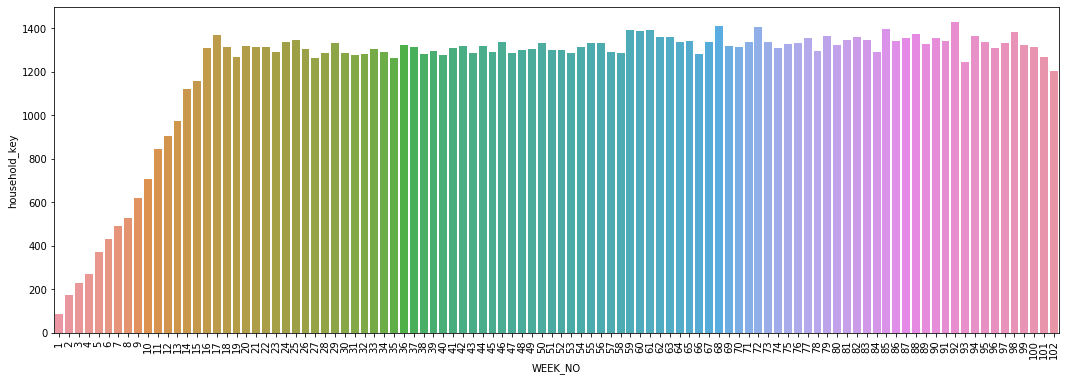

In [5]:
fig = plt.figure(1, figsize=(18,6))
ax=sns.barplot(x='WEEK_NO',y='household_key',data=total_household)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Declining  in last 4 weeks.

In [6]:
churn=transaction_data_df.groupby('household_key').agg({'WEEK_NO':'max'}).reset_index()
churn['has_churned']=(churn['WEEK_NO']>100)
del churn['WEEK_NO']

In [7]:
household_master=pd.merge(hh_demographic_df,churn,on='household_key')


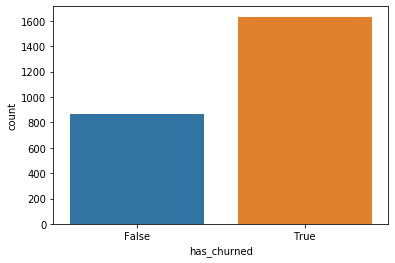

In [7]:
ax=sns.countplot(churn['has_churned'])

Feature Engineering

In [8]:
household_campaign=pd.merge(household_master,campaign_table_df,on='household_key')

In [9]:
household_campaign=household_campaign.groupby(['household_key','DESCRIPTION']).agg({'CAMPAIGN':'count'}).reset_index()
household_campaign

,household_key,DESCRIPTION,CAMPAIGN
0,1,TypeA,3
1,1,TypeB,4
2,1,TypeC,1
3,7,TypeA,1
4,7,TypeB,3
5,8,TypeA,3
6,8,TypeB,7
7,13,TypeA,3
8,13,TypeB,6
9,13,TypeC,1


In [10]:
campaign_type=household_campaign.pivot(index='household_key',columns='DESCRIPTION',values='CAMPAIGN').fillna(0)
#campaign_type

In [11]:
household_master=pd.merge(household_master,campaign_type,on='household_key',how='left')

In [67]:
household_master

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Mean_Income,has_churned,TypeA,TypeB,TypeC
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,42000,True,3.0,4.0,1.0
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,62000,True,1.0,3.0,0.0
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8,29500,True,3.0,7.0,0.0
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13,87000,True,3.0,6.0,1.0
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16,62000,False,1.0,1.0,0.0
5,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,17,7500,False,5.0,0.0,0.0
6,45-54,A,100-124K,Homeowner,2 Adults No Kids,2,None/Unknown,18,112000,True,3.0,1.0,0.0
7,35-44,B,15-24K,Unknown,Single Female,1,None/Unknown,19,19500,True,3.0,4.0,2.0
8,25-34,A,75-99K,Renter,2 Adults No Kids,2,None/Unknown,20,87000,True,3.0,4.0,0.0
9,45-54,A,75-99K,Homeowner,2 Adults No Kids,2,None/Unknown,22,87000,True,5.0,3.0,0.0


In [12]:
transaction_data_df['Total_Sales']=transaction_data_df['SALES_VALUE']+transaction_data_df['RETAIL_DISC']+transaction_data_df['COUPON_DISC']+transaction_data_df['COUPON_MATCH_DISC']


In [13]:
household_master=pd.merge(household_master,transaction_data_df.groupby('household_key').agg({'Total_Sales':'sum'}),on='household_key')
#ransaction_data_df.groupby('household_key').agg({'Total_Sales':'sum'})

In [14]:
household_master=pd.merge(household_master,coupon_redempt_df.groupby('household_key').agg({'COUPON_UPC':'count'}),on='household_key',how='left')


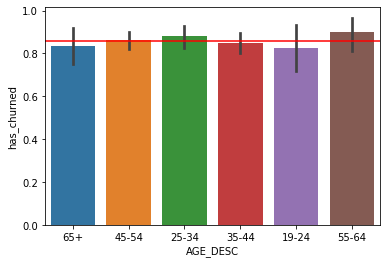

AGE_DESC               689
MARITAL_STATUS_CODE    689
INCOME_DESC            689
HOMEOWNER_DESC         689
HH_COMP_DESC           689
HOUSEHOLD_SIZE_DESC    689
KID_CATEGORY_DESC      689
household_key          689
Mean_Income            689
has_churned            689
TypeA                  661
TypeB                  661
TypeC                  661
Total_Sales            689
COUPON_UPC             281
dtype: int64

In [71]:
ax=sns.barplot(x='AGE_DESC',y='has_churned',data=household_master)
ax.axhline(y=household_master.has_churned.sum()/len(household_master),c="red",label="population mean")
plt.show()

household_master[household_master['has_churned']==1].count()

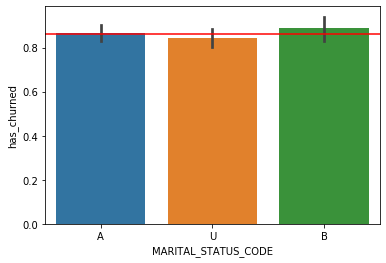

In [72]:
ax=sns.barplot(x='MARITAL_STATUS_CODE',y='has_churned',data=household_master)
ax.axhline(y=household_master.has_churned.sum()/len(household_master),c="red",label="population mean")
plt.show()


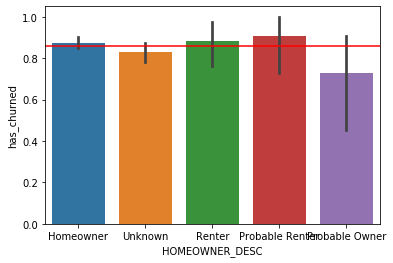

In [73]:
ax=sns.barplot(x='HOMEOWNER_DESC',y='has_churned',data=household_master)
ax.axhline(y=household_master.has_churned.sum()/len(household_master),c="red",label="population mean")
plt.show()

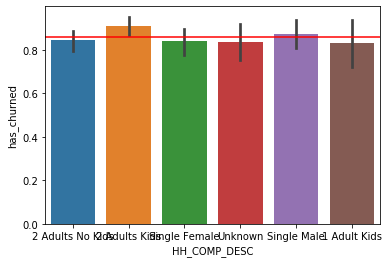

In [74]:
ax=sns.barplot(x='HH_COMP_DESC',y='has_churned',data=household_master)
ax.axhline(y=household_master.has_churned.sum()/len(household_master),c="red",label="population mean")
plt.show()

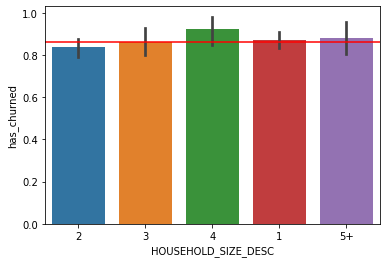

In [75]:
ax=sns.barplot(x='HOUSEHOLD_SIZE_DESC',y='has_churned',data=household_master)
ax.axhline(y=household_master.has_churned.sum()/len(household_master),c="red",label="population mean")
plt.show()

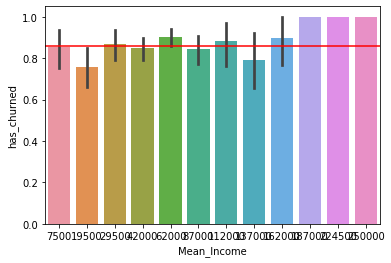

In [76]:
ax=sns.barplot(x='Mean_Income',y='has_churned',data=household_master)
ax.axhline(y=household_master.has_churned.sum()/len(household_master),c="red",label="population mean")
plt.show()

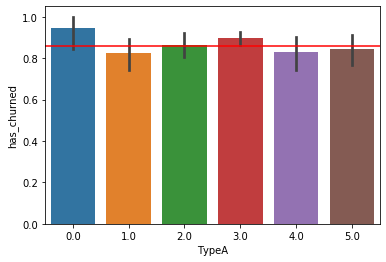

In [77]:
ax=sns.barplot(x='TypeA',y='has_churned',data=household_master)
ax.axhline(y=household_master.has_churned.sum()/len(household_master),c="red",label="population mean")
plt.show()

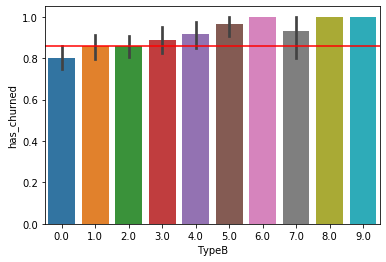

In [78]:
ax=sns.barplot(x='TypeB',y='has_churned',data=household_master)
ax.axhline(y=household_master.has_churned.sum()/len(household_master),c="red",label="population mean")
plt.show()

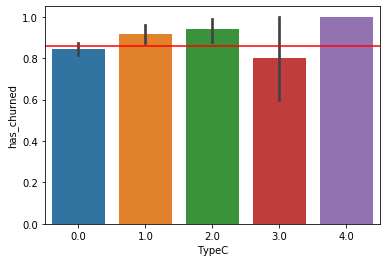

In [79]:
ax=sns.barplot(x='TypeC',y='has_churned',data=household_master)
ax.axhline(y=household_master.has_churned.sum()/len(household_master),c="red",label="population mean")
plt.show()

In [15]:
one_hot = pd.get_dummies(household_master['AGE_DESC'])
household_master = household_master.drop('AGE_DESC',axis = 1)
# Join the encoded df
household_master = household_master.join(one_hot)
household_master  

,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Mean_Income,has_churned,TypeA,TypeB,TypeC,Total_Sales,COUPON_UPC,19-24,25-34,35-44,45-54,55-64,65+
0,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,42000,True,3.0,4.0,1.0,3526.41,5.0,0,0,0,0,0,1
1,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,62000,True,1.0,3.0,0.0,2881.99,NaN,0,0,0,1,0,0
2,U,25-34K,Unknown,2 Adults Kids,3,1,8,29500,True,3.0,7.0,0.0,4426.47,1.0,0,1,0,0,0,0
3,U,75-99K,Homeowner,2 Adults Kids,4,2,13,87000,True,3.0,6.0,1.0,11177.61,21.0,0,1,0,0,0,0
4,B,50-74K,Homeowner,Single Female,1,None/Unknown,16,62000,False,1.0,1.0,0.0,1339.73,NaN,0,0,0,1,0,0
5,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,17,7500,False,5.0,0.0,0.0,3953.57,NaN,0,0,0,0,0,1
6,A,100-124K,Homeowner,2 Adults No Kids,2,None/Unknown,18,112000,True,3.0,1.0,0.0,6087.57,8.0,0,0,0,1,0,0
7,B,15-24K,Unknown,Single Female,1,None/Unknown,19,19500,True,3.0,4.0,2.0,8229.87,1.0,0,0,1,0,0,0
8,A,75-99K,Renter,2 Adults No Kids,2,None/Unknown,20,87000,True,3.0,4.0,0.0,6643.79,NaN,0,1,0,0,0,0
9,A,75-99K,Homeowner,2 Adults No Kids,2,None/Unknown,22,87000,True,5.0,3.0,0.0,5375.52,25.0,0,0,0,1,0,0


In [16]:
one_hot = pd.get_dummies(household_master['MARITAL_STATUS_CODE'])
household_master = household_master.drop('MARITAL_STATUS_CODE',axis = 1)
# Join the encoded df
household_master = household_master.join(one_hot)
household_master.head()

,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Mean_Income,has_churned,TypeA,TypeB,...,COUPON_UPC,19-24,25-34,35-44,45-54,55-64,65+,A,B,U
0,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,42000,True,3.0,4.0,...,5.0,0,0,0,0,0,1,1,0,0
1,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,62000,True,1.0,3.0,...,NaN,0,0,0,1,0,0,1,0,0
2,25-34K,Unknown,2 Adults Kids,3,1,8,29500,True,3.0,7.0,...,1.0,0,1,0,0,0,0,0,0,1
3,75-99K,Homeowner,2 Adults Kids,4,2,13,87000,True,3.0,6.0,...,21.0,0,1,0,0,0,0,0,0,1
4,50-74K,Homeowner,Single Female,1,None/Unknown,16,62000,False,1.0,1.0,...,NaN,0,0,0,1,0,0,0,1,0


In [17]:
del household_master['INCOME_DESC']

In [18]:
del household_master['HH_COMP_DESC']

In [19]:
household_master.HOUSEHOLD_SIZE_DESC.replace("5+",5,inplace=True)
household_master.HOUSEHOLD_SIZE_DESC = household_master.HOUSEHOLD_SIZE_DESC.astype(int)
household_master.KID_CATEGORY_DESC.replace(["None/Unknown","3+"],[0,3],inplace=True)
household_master.KID_CATEGORY_DESC = household_master.KID_CATEGORY_DESC.astype(int)
household_master.head()

,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Mean_Income,has_churned,TypeA,TypeB,TypeC,Total_Sales,COUPON_UPC,19-24,25-34,35-44,45-54,55-64,65+,A,B,U
0,Homeowner,2,0,1,42000,True,3.0,4.0,1.0,3526.41,5.0,0,0,0,0,0,1,1,0,0
1,Homeowner,2,0,7,62000,True,1.0,3.0,0.0,2881.99,NaN,0,0,0,1,0,0,1,0,0
2,Unknown,3,1,8,29500,True,3.0,7.0,0.0,4426.47,1.0,0,1,0,0,0,0,0,0,1
3,Homeowner,4,2,13,87000,True,3.0,6.0,1.0,11177.61,21.0,0,1,0,0,0,0,0,0,1
4,Homeowner,1,0,16,62000,False,1.0,1.0,0.0,1339.73,NaN,0,0,0,1,0,0,0,1,0


In [20]:
one_hot = pd.get_dummies(household_master['HOMEOWNER_DESC'])
household_master = household_master.drop('HOMEOWNER_DESC',axis = 1)
# Join the encoded df
household_master = household_master.join(one_hot)
household_master.head()

,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Mean_Income,has_churned,TypeA,TypeB,TypeC,Total_Sales,COUPON_UPC,...,55-64,65+,A,B,U,Homeowner,Probable Owner,Probable Renter,Renter,Unknown
0,2,0,1,42000,True,3.0,4.0,1.0,3526.41,5.0,...,0,1,1,0,0,1,0,0,0,0
1,2,0,7,62000,True,1.0,3.0,0.0,2881.99,NaN,...,0,0,1,0,0,1,0,0,0,0
2,3,1,8,29500,True,3.0,7.0,0.0,4426.47,1.0,...,0,0,0,0,1,0,0,0,0,1
3,4,2,13,87000,True,3.0,6.0,1.0,11177.61,21.0,...,0,0,0,0,1,1,0,0,0,0
4,1,0,16,62000,False,1.0,1.0,0.0,1339.73,NaN,...,0,0,0,1,0,1,0,0,0,0


In [21]:
#checking for nulls
household_master.isna().mean(axis=0)

HOUSEHOLD_SIZE_DESC    0.000000
KID_CATEGORY_DESC      0.000000
household_key          0.000000
Mean_Income            0.000000
has_churned            0.000000
TypeA                  0.051186
TypeB                  0.051186
TypeC                  0.051186
Total_Sales            0.000000
COUPON_UPC             0.611735
19-24                  0.000000
25-34                  0.000000
35-44                  0.000000
45-54                  0.000000
55-64                  0.000000
65+                    0.000000
A                      0.000000
B                      0.000000
U                      0.000000
Homeowner              0.000000
Probable Owner         0.000000
Probable Renter        0.000000
Renter                 0.000000
Unknown                0.000000
dtype: float64

In [22]:
household_master['TypeA']=household_master['TypeA'].fillna(0)
household_master['TypeB']=household_master['TypeB'].fillna(0)
household_master['TypeC']=household_master['TypeC'].fillna(0)
household_master['COUPON_UPC']=household_master['COUPON_UPC'].fillna(0)

In [23]:
household_master['has_churned']=household_master['has_churned'].astype(int)

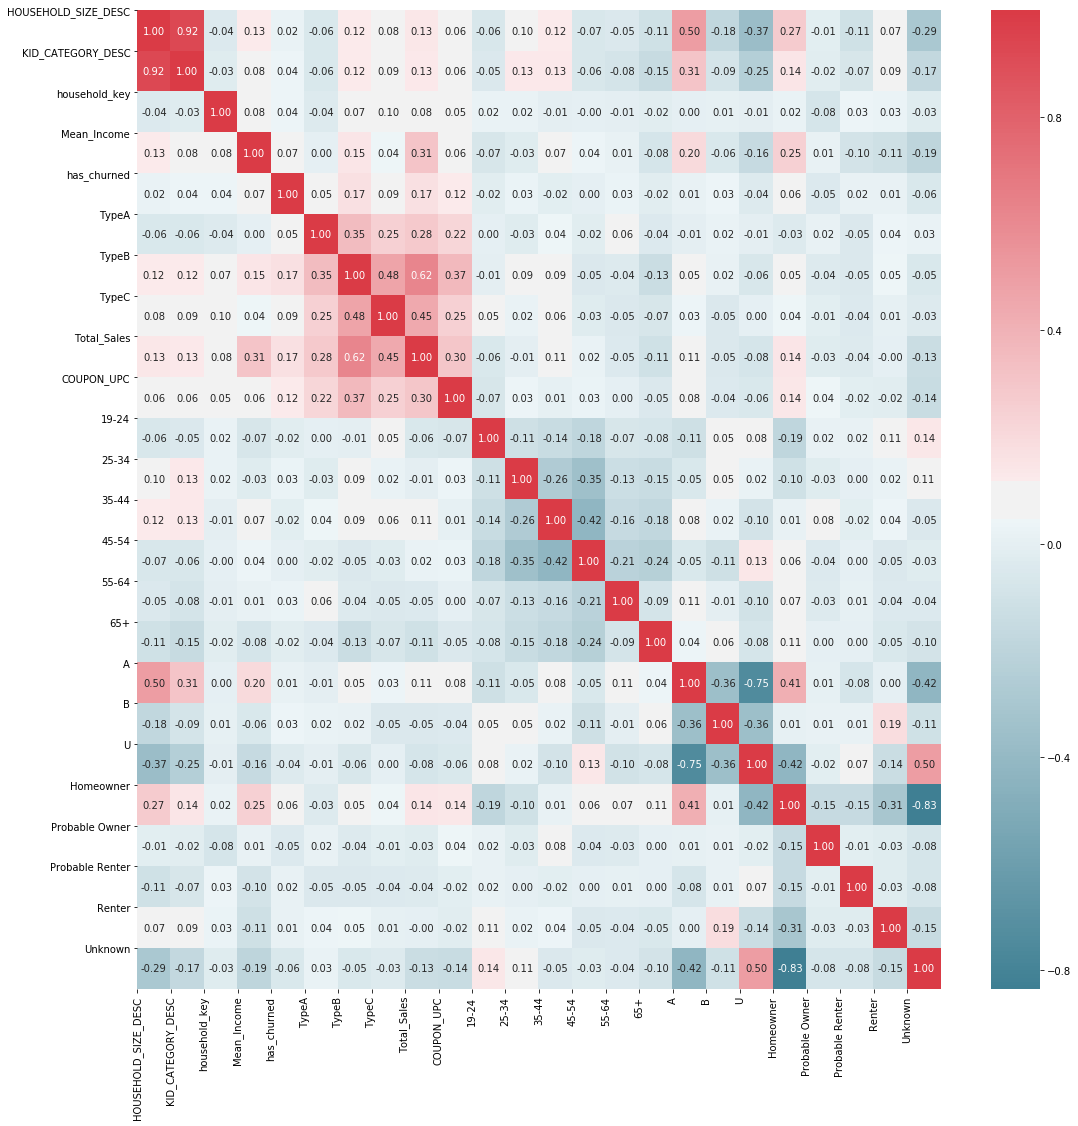

In [24]:
corr = household_master.corr()
fig, ax = plt.subplots(figsize=(18, 18))
    #Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

There is a high correlation between total sales and Type B coupons. There is also a high correlation between household size and kid category. So we can delete household size.

In [25]:
del household_master['HOUSEHOLD_SIZE_DESC']

## Modelling

### Train test split

In [29]:
#Features (X) and the target (y)
random.seed(10)
X = household_master.drop("has_churned",axis=1)
y = household_master.has_churned

#lets start with the default hyperparameters and hold-out mechanism for train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

#### Logistic Regression